<a href="https://colab.research.google.com/github/inesdarosa/visualizaciones_analisis/blob/main/ancapC7_mediana_ultimas_6horas_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import math
from keras import models, layers, optimizers, regularizers
import random
from keras.layers import Dense, Activation, Dropout
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [5]:
C7_2022 = pd.read_csv('/content/drive/MyDrive/ejercicios_proyectos/ancap/DATACHALLENGE 2022/Desafio_Contenido_C7_Total_11-2017_09-2021.csv')
var_ind_2022 = pd.read_csv('/content/drive/MyDrive/ejercicios_proyectos/ancap/DATACHALLENGE 2022/Desafio_VariablesControl_DCH2022.csv', sep=';')


In [6]:
C7_2022.Contenido_C7_Total = pd.to_numeric(C7_2022.Contenido_C7_Total, errors='coerce')
var_ind_2022['TimeStamp'] = pd.to_datetime(var_ind_2022['TimeStamp'])
print(C7_2022.head())
print(var_ind_2022.head())


        Fecha      Hora  Contenido_C7_Total  \
0  2017-11-13  07:55:00                1.58   
1  2017-11-14  07:00:00                0.87   
2  2017-11-16  07:00:00                1.29   
3  2017-11-17  07:00:00                1.90   
4  2017-11-19  07:00:00                0.68   

                              archivo  
0   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
1   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
2   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
3  CARGA_ISOM_CAB_2102E-2017-11 .xlsx  
4   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
            TimeStamp  tdc_phd.pi_21030  tdc_phd.pic_21034  tdc_phd.pi_21035  \
0 2017-01-01 00:00:00           0.81798            0.83386           0.90135   
1 2017-01-01 00:01:00           0.81787            0.83426           0.90164   
2 2017-01-01 00:02:00           0.81777            0.83466           0.90194   
3 2017-01-01 00:03:00           0.81767            0.83505           0.90223   
4 2017-01-01 00:04:00           0.81756            0.83545           0.90252 

In [7]:
C7_2022['Fecha_Hora'] = pd.to_datetime(C7_2022['Fecha'] + ' ' + C7_2022['Hora'])
print(C7_2022.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               1049 non-null   object        
 1   Hora                1049 non-null   object        
 2   Contenido_C7_Total  1048 non-null   float64       
 3   archivo             1049 non-null   object        
 4   Fecha_Hora          1049 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 41.1+ KB
None


In [24]:
C7_2022.dropna(inplace=True)
var_ind_2022.dropna(inplace=True)

In [25]:
var_ind_2022['indice'] = np.arange(var_ind_2022.shape[0])

dfXinterval_clean = []

for i in range(len(C7_2022)):
    mask = var_ind_2022['TimeStamp'] == C7_2022.iloc[i,4]
    ind = var_ind_2022.loc[mask]['indice']
    matriz_vars_tiempo = pd.DataFrame()
    for j in range(360):
        #print("indice>" +str(ind))
        #print("j>"+str(j))
        fila = var_ind_2022.iloc[ind-j,1:-1]
        #print(fila)
        matriz_vars_tiempo = matriz_vars_tiempo.append(fila, ignore_index = True)
    dfXinterval_clean.append(matriz_vars_tiempo)

In [26]:
list_indep = []

for i in range(len(C7_2022)):
    mediana = dfXinterval_clean[i].describe().iloc[5,].values
    list_indep.append(mediana)


In [27]:
list_indep[0:3]

[array([  0.82295 ,   0.82834 ,   0.85039 ,  99.53842 ,  74.10052 ,
         39.09554 , 146.65527 , 133.9634  , 133.9607  , 142.35582 ,
         70.538655,  70.000155,  35.00312 ,  21.00262 ,   2.97143 ,
         40.01533 ,   7.86349 ,   0.72959 ,   4.51    ,  17.69    ,
          0.75569 ,   0.67096 ,  70.001465,  21.74582 , 452.574435,
         19.29203 ,  20.500545, 202.68887 ,  26.80579 ,  10.900415,
         20.87912 , 140.97337 ,  42.186225]),
 array([  0.818255,   0.828735,   0.837565, 102.34844 ,  72.366   ,
         31.7667  , 151.701355, 134.49783 , 134.492235, 145.12355 ,
         69.96511 ,  70.21297 ,  23.93411 ,  16.99944 ,   3.111825,
         39.966065,  11.61508 ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,  69.90878 ,  24.09409 , 453.09631 ,
         20.23472 ,  20.2977  , 175.96255 ,  23.15551 ,  10.84521 ,
         23.94596 , 143.8875  ,  35.28984 ]),
 array([8.21700000e-01, 8.33630000e-01, 8.51885000e-01, 1.04282020e+02,
        7.58351100e+

In [28]:
type(list_indep) 

array_indep = np.array(list_indep)

In [29]:
array_indep.shape

(1048, 33)

In [30]:
C7_total = C7_2022['Contenido_C7_Total']
type(C7_total)


pandas.core.series.Series

In [31]:
C7_array = np.array(C7_total)
C7_array.shape


(1048,)

In [33]:
C7_array = np.reshape(C7_array, (1048,1))


In [34]:
C7_array.shape

(1048, 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(array_indep, C7_array, test_size=0.2, random_state=42)


In [36]:
print(X_train.shape)
print(y_train.shape)


(838, 33)
(838, 1)


In [37]:
XY_scaler = MinMaxScaler()
X_data_train = XY_scaler.fit_transform(X_train)
Y_data_train = XY_scaler.fit_transform(y_train)

X_data_test = XY_scaler.fit_transform(X_test)
Y_data_test = XY_scaler.fit_transform(y_test)



In [38]:
print(type(X_data_test))
print(Y_data_test.shape)


<class 'numpy.ndarray'>
(210, 1)


In [39]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=33,
                       units=64, 
                       activation='relu'))


model.add(layers.Dense(input_dim=64,
                       units=32,
                       activation='relu'))
model.add(layers.Dropout(0.2))

# add the output layer
model.add(layers.Dense(input_dim=32,
                       units=1,
                       activation='linear'))

# define our loss function and optimizer
model.compile(loss='mean_squared_error',
              # Adam is a kind of gradient descent
              optimizer='adam')

#optimizers.Adam(lr=0.01)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2176      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_data_train, Y_data_train, epochs=200, batch_size=20)

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 0.0195
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 9/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 10/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 11/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 12/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 13/200
42/42 [=================

In [42]:
ypred = model.predict(X_data_test)
print("MSE: %.4f" % mean_squared_error(Y_data_test, ypred))

7/7 [==============================] - 0s 2ms/step
MSE: 0.0312


In [43]:
ytest_orig = XY_scaler.inverse_transform(Y_data_test)
ypred_orig = XY_scaler.inverse_transform(ypred)

In [44]:
print("MSE sin escalar: %.4f" % mean_squared_error(ytest_orig, ypred_orig))

MSE sin escalar: 1.0556


In [ ]:
# Esto hay que revisarlo
#print(sum(((ytest_orig-ypred_orig)/ypred_orig)>0.10))

In [45]:
print(sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))) 

[29]


In [46]:
len(ytest_orig) - sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))

array([181])

In [47]:
23*100/210

10.952380952380953

En el resultado anterior solo 23 casos estarían dentro del 10%, o sea que la gran mayoría de los casos los valores predichos son un 10% mayor o menor comparado con los valores reals (ytest_orig)

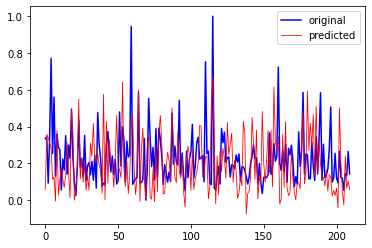

In [48]:
x_ax = range(len(ypred))
#plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, Y_data_test, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [49]:
history = model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

# evaluate accuracy
train_acc = model.evaluate(X_data_train, Y_data_train, batch_size=32)
test_acc = model.evaluate(X_data_test, Y_data_test, batch_size=32)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)


Epoch 1/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 8/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 12/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 13/100
84/84 [=================

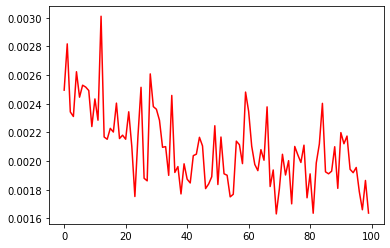

In [50]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()